In [13]:
from datasets import load_dataset

In [14]:
dataset = load_dataset("KANZOO/scrapped_articles")

In [48]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['title', 'text'],
        num_rows: 144
    })
})


In [49]:
# Function to merge all text into one large dataset
def merge_all_text(dataset):
    combined_text = ""
    for example in dataset['train']:
        combined_text += example['text'] + " "  # Add a space between articles
    return combined_text.strip()

# Merge all text from the dataset
combined_text = merge_all_text(dataset)

In [52]:
# checking the length of shorter sentences to clean up the dataset
def split_into_sentences(text):
    sentences = text.split("۔")  # Split the text at each Urdu period
    return [sentence.strip() for sentence in sentences if sentence.strip()]  # Remove leading/trailing spaces

# Function to find the length of each sentence
def sentence_lengths(sentences):
    return [len(sentence) for sentence in sentences]

# Define a threshold for "small" sentences (e.g., sentences with fewer than 5 words)
def find_small_sentences(sentences, length_threshold=3):
    small_sentences = [sentence for sentence in sentences if len(sentence.split()) < length_threshold]
    return small_sentences

# Split the cleaned text into sentences
sentences = split_into_sentences(combined_text)

# Get the length of each sentence
lengths = sentence_lengths(sentences)

# Find sentences that are shorter than the threshold
small_sentences = find_small_sentences(sentences)

# Output
print(f"Total number of sentences: {len(sentences)}")
print(f"Small sentences (less than 3 words): {small_sentences}")
print(f"Number of small sentences: {len(small_sentences)}")

Total number of sentences: 9251
Small sentences (less than 3 words): ['1', '2', '3', '1', '2', '3', '4', '519 ق', '476 ق', '(5', '(5', '1', '2', '3', '1', '2', '3', '4', '519 ق', '476 ق', '(5', '1', '2', '3', '1', '2', '3', '4', '519 ق', '476 ق']
Number of small sentences: 30


In [53]:
# Function to remove small sentences with fewer than 3 words
def remove_small_sentences(sentences, word_threshold=3):
    # Keep only sentences with 3 or more words
    filtered_sentences = [sentence for sentence in sentences if len(sentence.split()) >= word_threshold]
    return filtered_sentences

# Split the cleaned text into sentences
sentences = split_into_sentences(combined_text)

# Remove sentences that have fewer than 3 words
filtered_sentences = remove_small_sentences(sentences, word_threshold=3)

# Recombine the filtered sentences back into a single text
cleaned_filtered_text = "۔ ".join(filtered_sentences)  # Add back the Urdu period between sentences

# Output
print(f"Total number of sentences after filtering: {len(filtered_sentences)}")


Total number of sentences after filtering: 9221


In [54]:
# checking the length of shorter sentences to clean up the dataset further 
# Function to find sentences with 4 or fewer words
def find_small_sentences(sentences, word_threshold=3):
    # Find sentences that have 4 or fewer words
    small_sentences = [sentence for sentence in sentences if len(sentence.split()) <= word_threshold]
    return small_sentences

# Split the cleaned text into sentences
sentences = split_into_sentences(combined_text)

# Find sentences with 4 or fewer words
small_sentences = find_small_sentences(sentences, word_threshold=3)

# Output the small sentences for inspection
print("Sentences with 3 or fewer words:")
for sentence in small_sentences:
    print(sentence)

print(f"\nTotal number of sentences with 3 or fewer words: {len(small_sentences)}")

Sentences with 3 or fewer words:
1
2
3
1
2
3
4
مہاویر (527-599) ق
519 ق
476 ق
(5
(5
1
2
3
1
2
3
4
مہاویر (527-599) ق
519 ق
476 ق
(5
1
2
3
1
2
3
4
مہاویر (527-599) ق
519 ق
476 ق

Total number of sentences with 3 or fewer words: 33


In [58]:
# Function to remove sentences with 3 or fewer words
def remove_small_sentences(sentences, word_threshold=3):
    # Keep only sentences that have more than 3 words
    filtered_sentences = [sentence for sentence in sentences if len(sentence.split()) > word_threshold]
    return filtered_sentences

# Remove sentences with 3 or fewer words
filtered_sentences = remove_small_sentences(sentences, word_threshold=4)

print(f"\nTotal number of remaining sentences: {len(filtered_sentences)}")



Total number of remaining sentences: 9207


In [60]:
# Now find sentences with 4 or fewer words from the filtered list
small_sentences = find_small_sentences(filtered_sentences, word_threshold=5)

# Output the small sentences for inspection
print("Sentences with 4 or fewer words from filtered sentences:")
for sentence in small_sentences:
    print(sentence)

print(f"\nTotal number of sentences with 5 or fewer words: {len(small_sentences)}")

Sentences with 4 or fewer words from filtered sentences:
ایسا بالکل بھی نہیں تھا
مہاتما بدھ نے 483 ق
م میں یہ جہان چھوڑا
شاید یہی شاہی ایوان تھا
یہ ستمبر کا مہینہ تھا
سسی انتظار کرتے کرتے سوگئی
سلطان مایوس ہوکر واپس لوٹا‘
وہ یہاں بہت عرصہ رہا
یہ 1554ء کا زمانہ تھا
وہ سیاسی قوت کلہوڑا تھے
سسی انتظار کرتے کرتے سوگئی
سلطان مایوس ہوکر واپس لوٹا‘
وہ یہاں بہت عرصہ رہا
یہ 1554ء کا زمانہ تھا
وہ سیاسی قوت کلہوڑا تھے
ایسا بالکل بھی نہیں تھا
مہاتما بدھ نے 483 ق
م میں یہ جہان چھوڑا
شاید یہی شاہی ایوان تھا
یہ ستمبر کا مہینہ تھا
سسی انتظار کرتے کرتے سوگئی
سلطان مایوس ہوکر واپس لوٹا‘
وہ یہاں بہت عرصہ رہا
یہ 1554ء کا زمانہ تھا
وہ سیاسی قوت کلہوڑا تھے
ایسا بالکل بھی نہیں تھا
مہاتما بدھ نے 483 ق
م میں یہ جہان چھوڑا
شاید یہی شاہی ایوان تھا
یہ ستمبر کا مہینہ تھا

Total number of sentences with 5 or fewer words: 30


In [61]:
print(f"\nTotal number of remaining sentences: {len(filtered_sentences)}")


Total number of remaining sentences: 9207


In [62]:
import numpy as np
import pandas as pd



# Calculate lengths of sentences (word count)
sentence_lengths = [len(sentence.split()) for sentence in filtered_sentences]

# Calculate statistics
min_length = min(sentence_lengths)
max_length = max(sentence_lengths)
avg_length = np.mean(sentence_lengths)

# Create bins (you can adjust the bin ranges)
bins = [0, 5, 10, 15, 20, 30, 50, 100]
bin_labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
bin_counts = pd.cut(sentence_lengths, bins=bins, labels=bin_labels, right=False).value_counts()

# Output statistics
print(f"Smallest sentence length: {min_length}")
print(f"Largest sentence length: {max_length}")
print(f"Average sentence length: {avg_length:.2f}")

# Output bin distribution as a table
bin_distribution = pd.DataFrame({"Bin": bin_labels, "Count": bin_counts}).sort_index()
print("\nSentence Length Distribution:")
print(bin_distribution)

Smallest sentence length: 5
Largest sentence length: 187
Average sentence length: 26.89

Sentence Length Distribution:
         Bin  Count
0-4      0-4      0
5-9      5-9    553
10-14  10-14   1216
15-19  15-19   1657
20-29  20-29   2720
30-49  30-49   2331
50-99  50-99    693


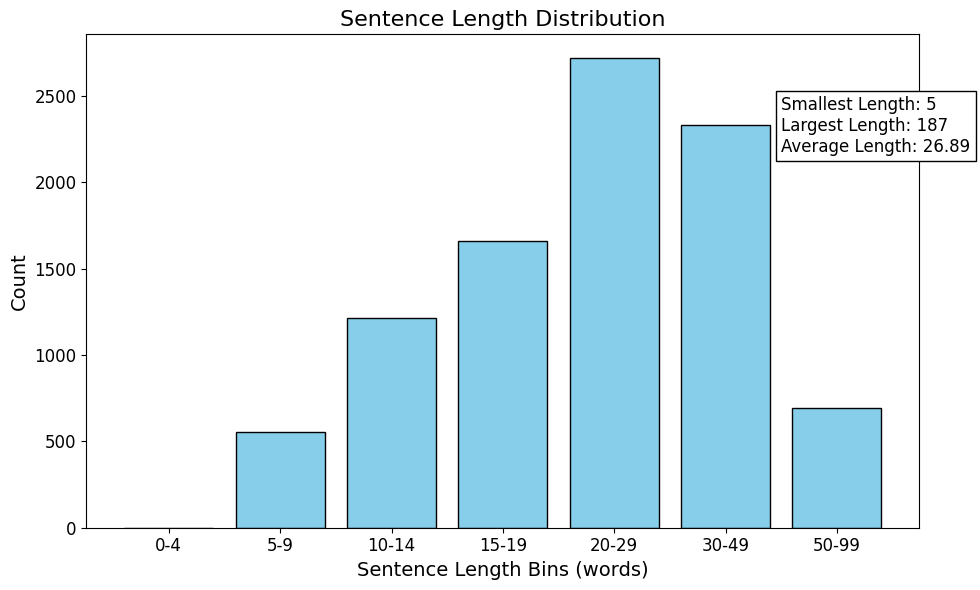

In [63]:
import matplotlib.pyplot as plt

# Example statistics (replace these with your calculated values)
smallest_length = 5
largest_length = 187
average_length = 26.89

# Example data for the chart
bins = ["0-4", "5-9", "10-14", "15-19", "20-29", "30-49", "50-99"]
counts = [0, 553, 1216, 1657, 2720, 2331, 693]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(bins, counts, color='skyblue', edgecolor='black')
plt.title('Sentence Length Distribution', fontsize=16)
plt.xlabel('Sentence Length Bins (words)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display statistics in the chart
stats_text = (
    f"Smallest Length: {smallest_length}\n"
    f"Largest Length: {largest_length}\n"
    f"Average Length: {average_length:.2f}"
)
plt.text(5.5, max(counts) * 0.8, stats_text, fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

# Show the chart
plt.tight_layout()
plt.show()


In [64]:


# Join all sentences into a single string
all_text = "".join(filtered_sentences)


all_text.count("!")



22

In [65]:
all_text.count("؟")

124

In [68]:
all_text.count(".")

54

In [71]:
all_text.count("۔")

0

In [70]:
all_text.count("،")

4436

In [73]:
all_text.count("@#$%^&*()_+=[]{}|;:.<>/")

0

In [74]:
len(filtered_sentences)

9207

In [77]:
# count the number of words
def count_words(all_text):
    words = all_text.split()
    return len(words)   
# Count the words in the merged text
word_count = count_words(combined_text)
# Print the total word count        
print("Total Word Count:", word_count)

Total Word Count: 247616
